In [47]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

rent_df = pd.read_csv('House_Rent_Dataset.csv')


# Formatting data frame

In [48]:
columns_to_drop = ['Posted On','BHK','Floor','Tenant Preferred','Point of Contact','Area Type','Area Locality','Furnishing Status','Bathroom','City']
rent_df.drop(columns_to_drop, axis=1, inplace=True)
rent_df = rent_df[rent_df['Rent'] < 1_000_000]

# Linear Stuff

[[1100]
 [ 800]
 [1000]
 ...
 [1750]
 [1500]
 [1000]]


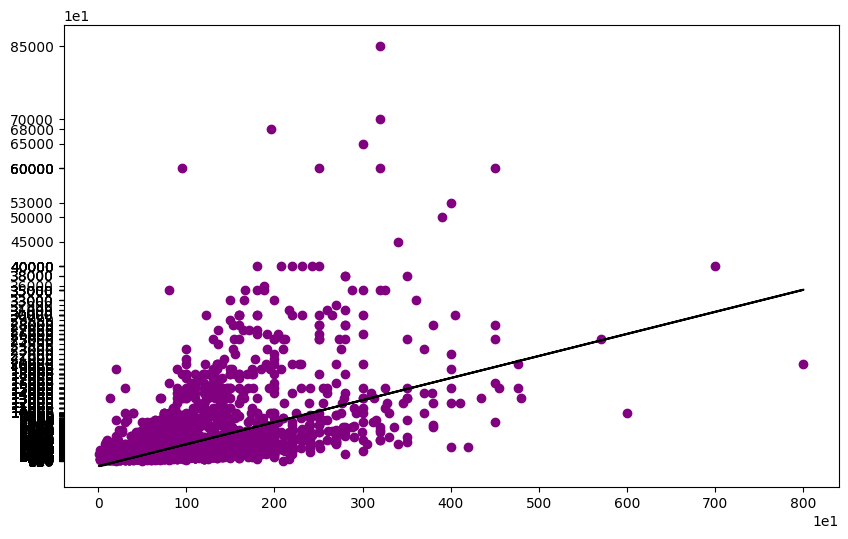

In [49]:
reg = LinearRegression()



feature = rent_df.drop('Rent',axis=1).values
target = rent_df['Rent'].values


feature_size = feature[:,0]
feature_size = feature_size.reshape(-1,1)

print(feature_size)

reg.fit(feature_size,target)

predictions = reg.predict(feature_size)

plt.figure(figsize=(10,6))

plt.scatter(feature_size,target,color='purple')
plt.plot(feature_size,predictions,color='black')
plt.ticklabel_format(axis='both', style='sci', scilimits=(1,1))
plt.yticks(target)
plt.show()


# R square 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train , X_test , y_train , y_test = train_test_split(feature,target,test_size=0.3,random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)

# R Square

In [51]:
reg_all.score(X_test,y_test)

0.26525689725116974

# RMSE in scikit-learn

In [52]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test , y_pred)

44095.72143401245

# Cross-Validation

In [54]:
from sklearn.model_selection import cross_val_score , KFold
kf = KFold(n_splits=6 , shuffle=True , random_state=42)

# returns an array of cross validation scores
cv_results = cross_val_score(reg,feature,feature,cv=kf)
print(cv_results)

print(np.mean(cv_results) , np.std(cv_results))


[1. 1. 1. 1. 1. 1.]
1.0 0.0


### Type 1 : Ridge Regression

In [56]:
from sklearn.linear_model import Ridge
scores = []

for alpha in [0.1,1.0,10.0,100,1000,10000,100000]:
    ridge = Ridge(alpha=alpha)
    print(ridge)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))

print(scores)

Ridge(alpha=0.1)
Ridge()
Ridge(alpha=10.0)
Ridge(alpha=100)
Ridge(alpha=1000)
Ridge(alpha=10000)
Ridge(alpha=100000)
[0.26525689725692636, 0.26525689730873325, 0.2652568978268022, 0.2652569030074905, 0.26525695481415423, 0.2652574728588635, 0.2652626511134627]


### Type 2 : Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
scores = []

for alpha in [0.1,1.0,10.0,100,1000]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test,y_test))

print(scores)

[0.26525689765982163, 0.26525690133768565, 0.26525693811623496, 0.26525730589266594, 0.2652609827507988]


: 